In [73]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#!pip install seaborn

Fonte dos Dados : https://fbref.com/pt/comps/24/2021/stats/2021-Serie-A-estatisticas

![legenda.png](legenda.png)

In [2]:
#leitura do arquivo  csv do campeonato brasileiro


df2020 = pd.read_csv('dados/serie_a_BR_estatísticas_2020.csv', sep=',',encoding = "UTF-8")
df2021 = pd.read_csv('dados/serie_a_BR_estatísticas_2021.csv', sep=',',encoding = "UTF-8")
df2022 = pd.read_csv('dados/serie_a_BR_estatísticas_2022.csv', sep=',',encoding = "UTF-8")


In [3]:
print("(Qtd Linhas , Qtd Colunas) 2020 = " ,  df2020.shape)
print("(Qtd Linhas , Qtd Colunas) 2021 = " ,  df2021.shape)
print("(Qtd Linhas , Qtd Colunas) 2022 = " ,  df2022.shape)

(Qtd Linhas , Qtd Colunas) 2020 =  (753, 38)
(Qtd Linhas , Qtd Colunas) 2021 =  (731, 38)
(Qtd Linhas , Qtd Colunas) 2022 =  (763, 38)


In [20]:
df2020["temporada"] = 2020
df2021["temporada"] = 2021
df2022["temporada"] = 2022

In [60]:
df = pd.concat([df2020,df2021,df2022])

print("(Qtd Linhas , Qtd Colunas) 2020 a 2022 = " ,  df.shape)

(Qtd Linhas , Qtd Colunas) 2020 a 2022 =  (2247, 39)


In [61]:
df.reset_index(drop=True)

,Class.,Jogador,Nação,Pos.,Equipe,Idade,Nascimento,MP,Inícios,Min.,...,G-PB.1,G+A-PB,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Partidas,-9999,temporada
0,1,Abner,br BRA,ZG,Atl Paranaense,19,2000,34,30,2.833,...,10,19,6.0,12.0,19.0,6.0,19.0,Partidas,7f9c5d2d,2020
1,2,Pedro Acacio,br BRA,LTZG,Palmeiras,17,2002,3,0,37.000,...,0,0,0.0,0.0,0.0,0.0,0.0,Partidas,1f4aaad9,2020
2,3,Luiz Adriano,br BRA,AT,Palmeiras,32,1987,24,19,1.538,...,47,64,44.0,9.0,54.0,29.0,39.0,Partidas,2557c196,2020
3,4,Adryelson,br BRA,ZG,Sport Recife,21,1998,36,36,3.216,...,0,0,2.0,0.0,2.0,2.0,2.0,Partidas,e980e78d,2020
4,5,Felipe Aguilar,co COL,ZG,Atl Paranaense,27,1993,11,5,532.000,...,0,0,4.0,1.0,5.0,4.0,5.0,Partidas,c285529f,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,759,Yago,br BRA,LTZG,Fluminense,26,1995,21,15,1.131,...,0,0,16.0,11.0,27.0,16.0,27.0,Partidas,e2add0e7,2022
2243,760,Ytalo,br BRA,AT,Bragantino,34,1988,11,7,625.000,...,43,43,18.0,4.0,22.0,18.0,22.0,Partidas,423e3d0b,2022
2244,761,Marcos Ytalo,br BRA,ZG,Ceará,25,1996,2,1,161.000,...,0,0,8.0,7.0,15.0,8.0,15.0,Partidas,70053afc,2022
2245,762,Vinícius Zanocelo,br BRA,LT,Santos,21,2001,28,26,2.004,...,13,13,15.0,6.0,21.0,15.0,21.0,Partidas,27457e83,2022


In [62]:
df.columns

Index(['Class.', 'Jogador', 'Nação', 'Pos.', 'Equipe', 'Idade', 'Nascimento',
       'MP', 'Inícios', 'Min.', '90s', 'Gols', 'Assis.', 'G+A', 'G-PB', 'PB',
       'PT', 'CrtsA', 'CrtV', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP',
       'PrgR', 'Gols.1', 'Assis..1', 'G+A.1', 'G-PB.1', 'G+A-PB', 'xG.1',
       'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'Partidas', '-9999',
       'temporada'],
      dtype='object')

In [63]:
df = df.drop(columns=['-9999','Partidas', 'Gols.1', 'Assis..1', 'G+A.1', 'G-PB.1', 'G+A-PB', 'xG.1',
       'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1','Idade','Class.'])

df.columns = df.columns.str.lower()

In [54]:
df.columns = df.columns.str.lower()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 762
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   jogador     2247 non-null   object 
 1   nação       2246 non-null   object 
 2   pos.        2247 non-null   object 
 3   equipe      2247 non-null   object 
 4   nascimento  2247 non-null   int64  
 5   mp          2247 non-null   int64  
 6   inícios     2247 non-null   int64  
 7   min.        2247 non-null   float64
 8   90s         2247 non-null   float64
 9   gols        2247 non-null   int64  
 10  assis.      2247 non-null   int64  
 11  g+a         2247 non-null   int64  
 12  g-pb        2247 non-null   int64  
 13  pb          2247 non-null   int64  
 14  pt          2247 non-null   int64  
 15  crtsa       2247 non-null   int64  
 16  crtv        2247 non-null   int64  
 17  xg          2221 non-null   float64
 18  npxg        2221 non-null   float64
 19  xag         2221 non-null   

In [76]:
df.isna().sum()

jogador        0
nação          1
pos.           0
equipe         0
nascimento     0
mp             0
inícios        0
min.           0
90s            0
gols           0
assis.         0
g+a            0
g-pb           0
pb             0
pt             0
crtsa          0
crtv           0
xg            26
npxg          26
xag           26
npxg+xag      26
prgc          26
prgp          26
prgr          26
temporada      0
dtype: int64

In [88]:
df[(df['nação'].str() == '')]

TypeError: 'StringMethods' object is not callable

C:\Users\ADM\AppData\Local\Temp\ipykernel_9260\1119662132.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);


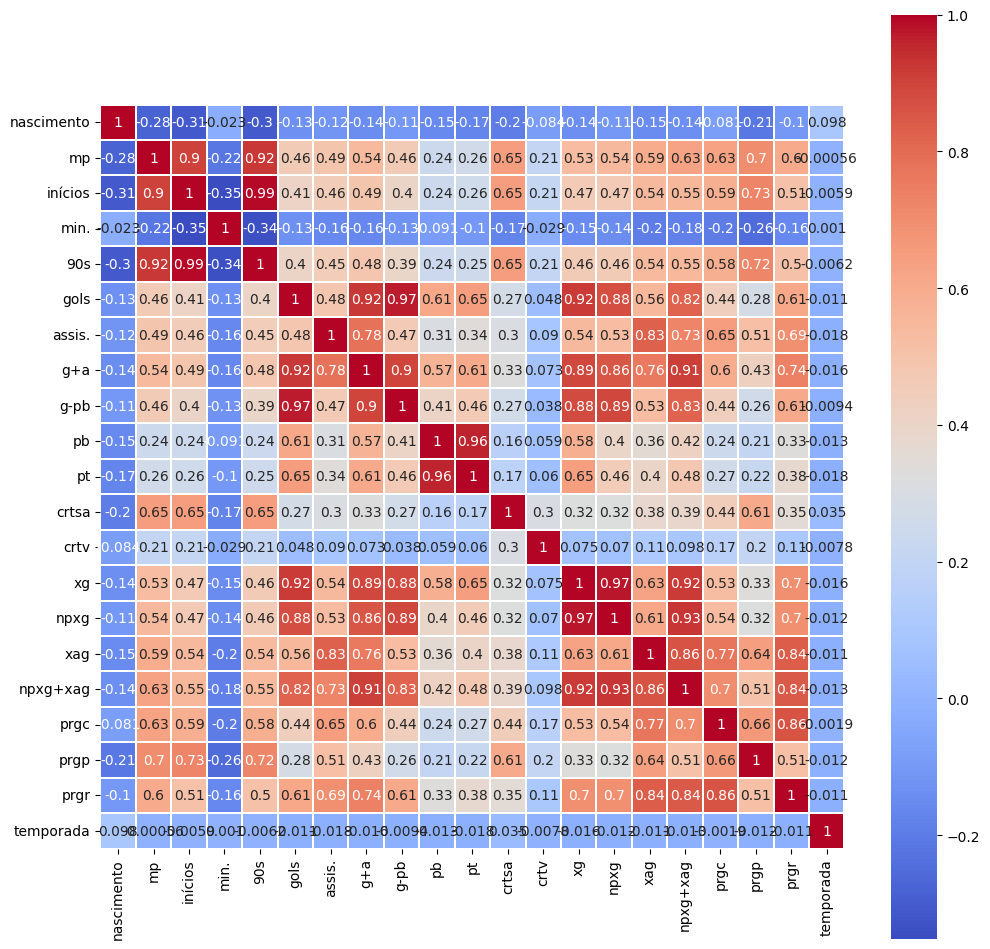

In [74]:
plt.figure(figsize=(12,12)) 
sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);

In [75]:
# listando features categoricas e numéricas:
categorical_attributes = list(df.select_dtypes(include=['object']).columns)
numerical_attributes = list(df.select_dtypes(include=['float64', 'int64']).columns)
print('categorical_attributes:', categorical_attributes)
print('numerical_attributes:', numerical_attributes)

categorical_attributes: ['jogador', 'nação', 'pos.', 'equipe']
numerical_attributes: ['nascimento', 'mp', 'inícios', 'min.', '90s', 'gols', 'assis.', 'g+a', 'g-pb', 'pb', 'pt', 'crtsa', 'crtv', 'xg', 'npxg', 'xag', 'npxg+xag', 'prgc', 'prgp', 'prgr', 'temporada']
